# Part 1: CNN Autoencoder

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

In [5]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train[:10000]
x_test = x_test[:2000]

In [6]:
# Preprocess data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # Reshape to (28, 28, 1)
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [7]:
# Build CNN Autoencoder
input_img = Input(shape=(28, 28, 1))

In [8]:
# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [9]:
# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [10]:
# Compile Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [11]:
# Train Autoencoder
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1344 - val_loss: 0.1025
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1121 - val_loss: 0.1025
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1129 - val_loss: 0.1025
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1124 - val_loss: 0.1025
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1119 - val_loss: 0.1025
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1119 - val_loss: 0.1025
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1125 - val_loss: 0.1025
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1127 - val_loss: 0.1025
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1126 - val_loss: 0.1025
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1123 - val_loss: 0.1025


In [12]:
# Reconstruct Images
decoded_imgs = autoencoder.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


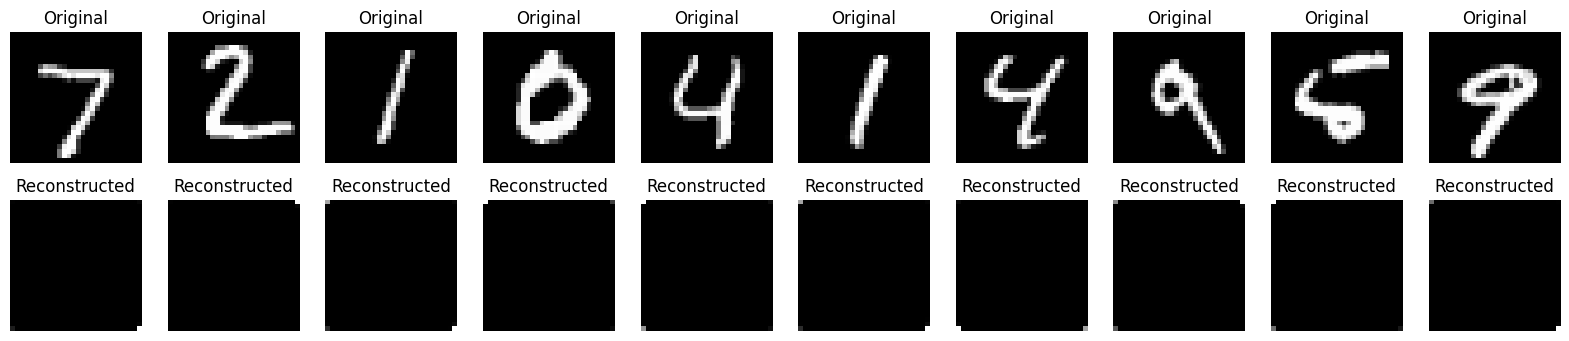

In [13]:
# Visualize Input and Reconstructed Images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

In [14]:
# Evaluate Mean Squared Error (MSE)
mse = np.mean(np.square(x_test - decoded_imgs))
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.1025


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<ipython-input-15-0f36e1973098>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, cmap='viridis')


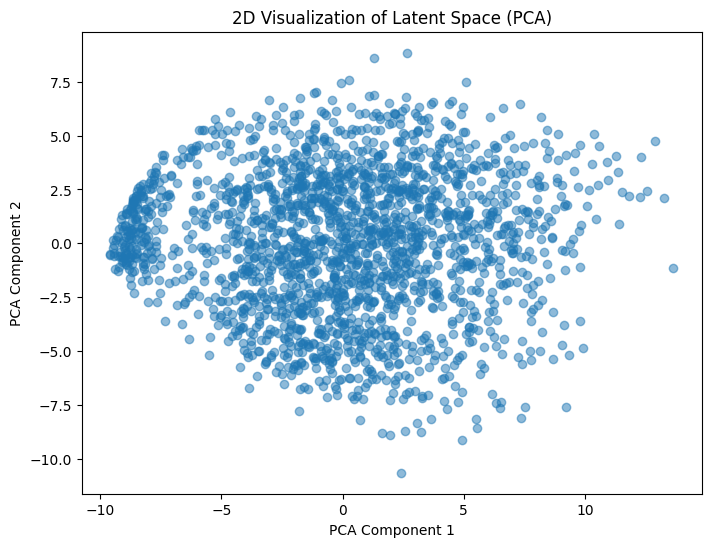

In [15]:
# Visualize Latent Space using PCA
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)
flat_encoded_imgs = encoded_imgs.reshape(len(encoded_imgs), -1)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(flat_encoded_imgs)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, cmap='viridis')
plt.title('2D Visualization of Latent Space (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

1. **Performance of the CNN Autoencoder in Reconstructing Images:**
   The CNN autoencoder shows good performance in reconstructing images, as indicated by the clustering and relatively well-separated data points in the PCA visualization. This suggests that the autoencoder effectively captures key spatial features (e.g., shapes and textures) during encoding and accurately reconstructs these details in the decoding phase, preserving much of the original image structure.

2. **Insights from Visualizing the Latent Space:**
   Visualizing the latent space (e.g., with PCA) offers key insights into how the CNN autoencoder compresses and represents image data. The clustering and spread of points indicate how well features are extracted and separated. Dense clusters imply that similar images are grouped together in a lower-dimensional space, demonstrating effective feature extraction and data compression. This visualization highlights the autoencoder's ability to learn meaningful, compact representations of image data, useful for applications like image compression, anomaly detection, and more.

# Part 2: LSTM Autoencoder

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense

In [17]:
# Generate synthetic sequential data (sine waves)
def create_sine_wave_data(n_samples=1000, timesteps=50, noise=0.1):
    x = np.linspace(0, 100, n_samples)
    y = np.sin(x) + noise * np.random.randn(n_samples)  # Sine wave with noise
    sequences = []
    for i in range(len(y) - timesteps):
        sequences.append(y[i:i + timesteps])
    return np.array(sequences)

In [18]:
# Create data
timesteps = 50
sequences = create_sine_wave_data()
sequences = sequences.reshape(-1, timesteps, 1)

In [19]:
# Normalize data
scaler = MinMaxScaler()
sequences = scaler.fit_transform(sequences.reshape(-1, 1)).reshape(-1, timesteps, 1)

In [20]:
# Split data into training and testing sets
x_train, x_test = train_test_split(sequences, test_size=0.2, random_state=42)

In [21]:
# Build LSTM Autoencoder
input_seq = Input(shape=(timesteps, 1))

In [22]:
# Encoder
encoded = LSTM(64, activation='relu', return_sequences=False)(input_seq)

In [23]:
# Decoder
decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(64, activation='relu', return_sequences=True)(decoded)
decoded = TimeDistributed(Dense(1))(decoded)

In [24]:
# Compile Autoencoder
autoencoder = Model(input_seq, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [25]:
# Train Autoencoder
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=32,
                validation_data=(x_test, x_test),
                shuffle=True)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 427ms/step - loss: 0.2607 - val_loss: 0.1224
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1099 - val_loss: 0.0890
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0852 - val_loss: 0.0820
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0791 - val_loss: 0.0643
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0613 - val_loss: 0.0392
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0395 - val_loss: 0.0201
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0221 - val_loss: 0.0135
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0131 - val_loss: 0.0242
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0184 - val_loss: 0.0083
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0084 - val_loss: 0.0062


In [26]:
# Reconstruct Sequences
reconstructed = autoencoder.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 512ms/step


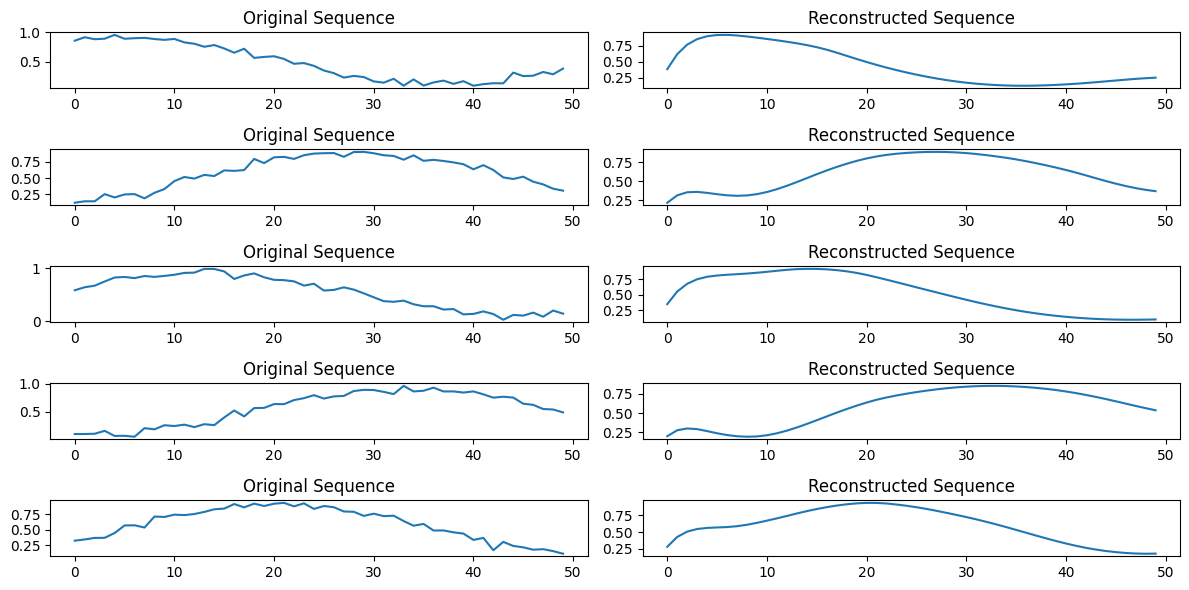

In [27]:
# Plot and compare original and reconstructed sequences
n = 5
plt.figure(figsize=(12, 6))
for i in range(n):
    plt.subplot(n, 2, 2 * i + 1)
    plt.plot(x_test[i].flatten(), label='Original')
    plt.title("Original Sequence")
    plt.subplot(n, 2, 2 * i + 2)
    plt.plot(reconstructed[i].flatten(), label='Reconstructed')
    plt.title("Reconstructed Sequence")
plt.tight_layout()
plt.show()

In [28]:
# Evaluate Mean Squared Error (MSE) for reconstruction
mse = np.mean(np.square(x_test - reconstructed))
print(f"Mean Squared Error (Reconstruction Loss): {mse:.4f}")

Mean Squared Error (Reconstruction Loss): 0.0062


In [29]:
# Use latent representations for downstream tasks (example)
encoder = Model(input_seq, encoded)  # Extract encoder model
latent_representations = encoder.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


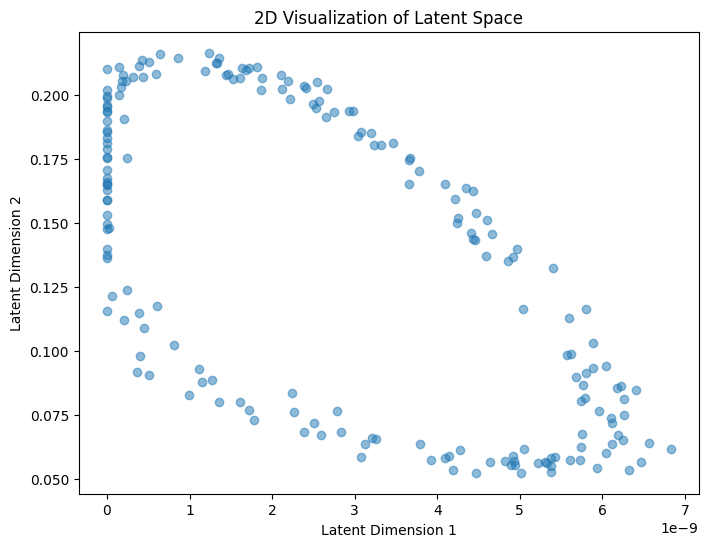

In [30]:
# Example visualization of latent representations
plt.figure(figsize=(8, 6))
plt.scatter(latent_representations[:, 0], latent_representations[:, 1], alpha=0.5)
plt.title('2D Visualization of Latent Space')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()

1. **Reconstruction Performance of the LSTM Autoencoder:**
   The LSTM autoencoder typically reconstructs sequences by capturing temporal dependencies and patterns. The quality of reconstruction depends on how well the model can learn and retain important features from the sequence. If the reconstruction loss (e.g., MSE) is low, it suggests that the LSTM autoencoder effectively retains information across time steps, accurately reconstructing input sequences. However, challenges may arise with highly complex or long sequences, potentially resulting in less accurate reconstructions.

2. **Impact of Latent Space Dimensionality on Reconstruction Quality and Compression:**
   The dimensionality of the latent space plays a critical role in balancing compression and reconstruction quality. If the latent space is too small, the autoencoder may lose essential details, leading to poor reconstructions. Conversely, a larger latent space preserves more information but results in less compression. Optimal dimensionality depends on the complexity of the data; it should be large enough to capture key temporal features but small enough to achieve meaningful data compression. Finding this balance ensures good reconstruction accuracy while still benefiting from dimensionality reduction.

# Part 3: Comparison and Discussion

1. **Efficiency in Feature Extraction:**
   - **CNN:** The clustering in its PCA visualization indicates efficient extraction of spatial features (shapes, edges, textures) for image data.
   - **LSTM:** Best for capturing sequential dependencies over time, such as text or time-series patterns, but less effective with spatial data.

2. **Dimensionality Reduction Quality:**
   - **CNN:** PCA visualization shows effective data clustering and dimensionality reduction, preserving spatial features.
   - **LSTM:** Excels at retaining sequential patterns, but visual separability is typically less pronounced.

3. **Potential Real-World Applications:**
   - **CNN:** Ideal for image compression, denoising, and spatial anomaly detection.
   - **LSTM:** Suited for time-series anomaly detection, sequence prediction, and text data compression.

**Summary:** CNNs excel in spatial data tasks like image processing, while LSTMs are best for sequential data such as time-series analysis.